# Restoring Faded Colored Photographs

## Contrast Stretching

## Gray World

In [28]:
import numpy as np
from PIL import Image

def gray_world(img_path):
    # Load the image
    img = Image.open(img_path)
    # Convert the image to a numpy array
    img_arr = np.array(img)
    # Get the average value of the red, green and blue channel of the image
    Rave = np.mean(img_arr[:,:,0])
    Gave = np.mean(img_arr[:,:,1])
    Bave = np.mean(img_arr[:,:,2])
    # To get the white balanced image, divide each RGB channel by the respective averages
    img_arr[:,:,0] = img_arr[:,:,0] / Rave * 128
    img_arr[:,:,1] = img_arr[:,:,1] / Gave * 128
    img_arr[:,:,2] = img_arr[:,:,2] / Bave * 128
    # Convert the numpy array back to an image
    balanced_img = Image.fromarray(np.uint8(img_arr))
    return balanced_img


In [30]:
balanced_img = gray_world('faded_einstein.jpg')
balanced_img.save('gray_restored_einstein.jpg')

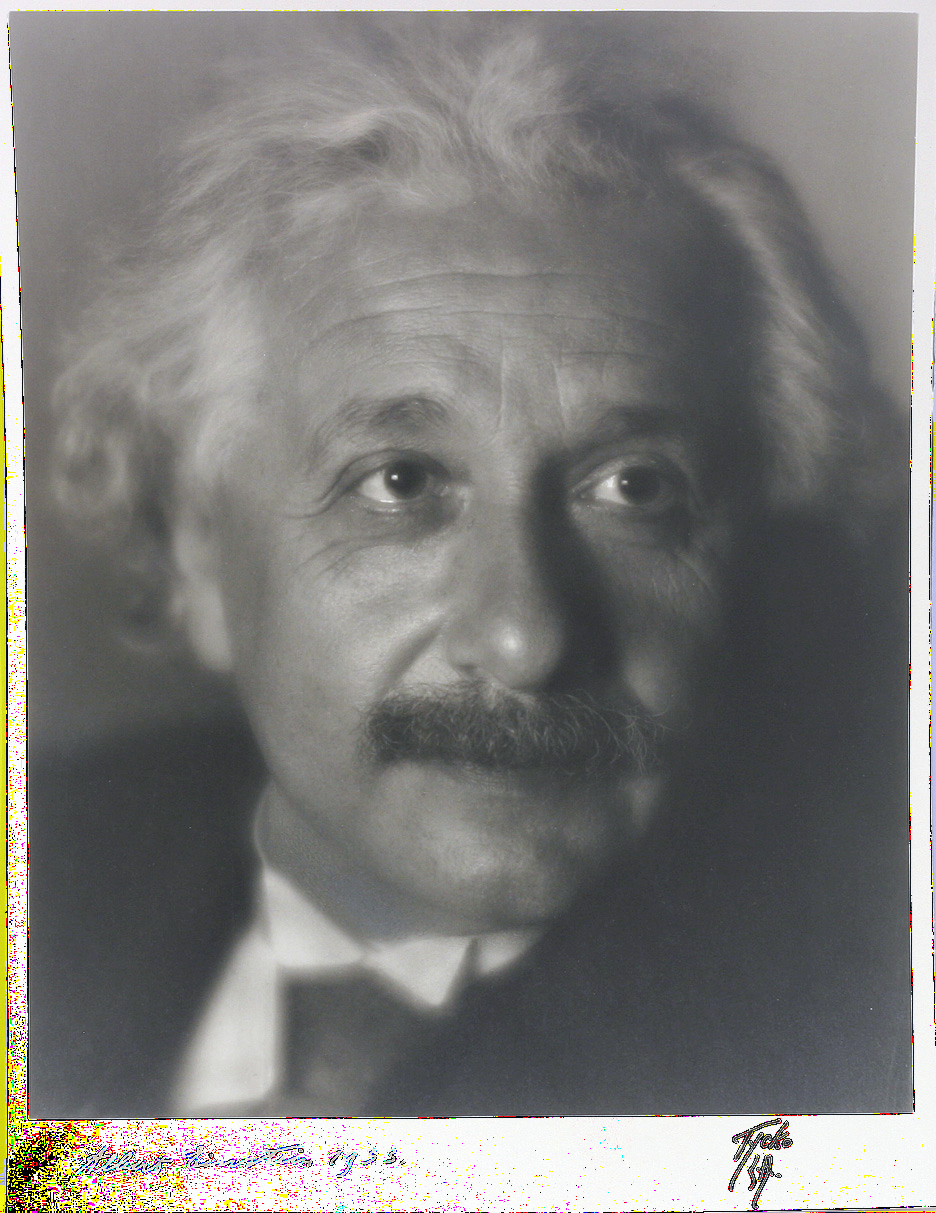

In [29]:
gray_world('faded_einstein.jpg')

## White Patch

In [31]:
import numpy as np
from PIL import Image

def white_patch(img_path, white_patch_region):
    # Load the image
    img = Image.open(img_path)
    # Convert the image to a numpy array
    img_arr = np.array(img)
    # Get the white patch region from the image
    white_patch_arr = img_arr[white_patch_region[0]:white_patch_region[1], white_patch_region[2]:white_patch_region[3]]
    # Get the average value of the red, green and blue channel of the white patch region
    Rw = np.mean(white_patch_arr[:,:,0])
    Gw = np.mean(white_patch_arr[:,:,1])
    Bw = np.mean(white_patch_arr[:,:,2])
    # Divide each channel of the whole original image with the respective white averages
    img_arr[:,:,0] = img_arr[:,:,0] / Rw * 255
    img_arr[:,:,1] = img_arr[:,:,1] / Gw * 255
    img_arr[:,:,2] = img_arr[:,:,2] / Bw * 255
    # Convert the numpy array back to an image
    balanced_img = Image.fromarray(np.uint8(img_arr))
    return balanced_img


In [43]:
white_patch_region = (480,495,367,383)  # top, bottom, left, right coordinates of the region
balanced_img = white_patch('faded_einstein.jpg', white_patch_region)
balanced_img.show()

In [42]:
import cv2

# Define the mouse event handler function
def mouse_event_handler(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # if left mouse button is clicked
        print(f'Coordinates: ({x}, {y})')

# Load the image using OpenCV
img = cv2.imread('faded_einstein.jpg')

# Create a window to display the image
cv2.namedWindow('image')

# Set the mouse event handler function to the window
cv2.setMouseCallback('image', mouse_event_handler)

# Display the image in the window
cv2.imshow('image', img)
cv2.waitKey(0)  # Wait for a key to be pressed to close the window
cv2.destroyAllWindows()  # Close all windows

Coordinates: (374, 480)
Coordinates: (375, 495)
Coordinates: (367, 489)
Coordinates: (383, 489)


In [ ]:
480,495,367,383